In [1]:
!git clone https://github.com/juanserrano90/codelatam.git

Cloning into 'codelatam'...
remote: Enumerating objects: 75753, done.
remote: Counting objects: 100% (3936/3936), done.
remote: Compressing objects: 100% (3927/3927), done.
remote: Total 75753 (delta 12), reused 3931 (delta 9), pack-reused 71817 (from 2)
Receiving objects: 100% (75753/75753), 693.33 MiB | 24.94 MiB/s, done.
Resolving deltas: 100% (1272/1272), done.
Updating files: 100% (90961/90961), done.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [4]:
working_dir = "/content/drive/MyDrive/Doctorado/Codelatam/Files_codelatam"
phase1_dir = os.path.join(working_dir, "Runs/Phase1")
phase2_dir = os.path.join(working_dir, "Runs/Phase2")

In [5]:
def extract_macro_f1(report_path):
    with open(report_path, "r") as f:
        text = f.read()
    # Match line like:
    # macro avg       0.85      0.84      0.84      1200
    match = re.search(r"macro avg\s+[\d\.]+\s+[\d\.]+\s+([\d\.]+)", text)

    if match is None:
        raise ValueError(f"Could not find macro avg F1 in {report_path}")

    return float(match.group(1))


In [6]:
phase1_dir = "/content/drive/MyDrive/Doctorado/Codelatam/Files_codelatam/Runs/Phase1"

records = []

for run_name in sorted(os.listdir(phase1_dir)):
    run_path = os.path.join(phase1_dir, run_name)
    if not os.path.isdir(run_path):
        continue

    # Find classification report
    report_files = [
        f for f in os.listdir(run_path)
        if f.startswith("clfreport") and f.endswith(".txt")
    ]

    if len(report_files) == 0:
        continue

    report_path = os.path.join(run_path, report_files[0])
    macro_f1 = extract_macro_f1(report_path)

    # Parse backbone + regime
    # Examples: ViT32_F, ViT32_UF, ViT32_UF4
    parts = run_name.split("_")
    backbone = parts[0]

    if parts[1] == "F":
        regime = "Frozen"
        version = "F"
    elif parts[1].startswith("UF"):
        regime = "Unfrozen"
        version = parts[1]  # UF or UF4
    else:
        regime = "Other"
        version = parts[1]

    records.append({
        "run": run_name,
        "backbone": backbone,
        "regime": regime,
        "version": version,
        "macro_f1": macro_f1,
    })

df = pd.DataFrame(records)
df

""


In [7]:
import os
import pandas as pd
import numpy as np

phase1_dir = "/content/drive/MyDrive/Doctorado/Codelatam/Files_codelatam/Runs/Phase1"

records = []
splits = ["split1", "split2", "split3"]

for run_name in sorted(os.listdir(phase1_dir)):
    run_path = os.path.join(phase1_dir, run_name)
    if not os.path.isdir(run_path):
        continue

    split_results = {}

    for split in splits:
        split_path = os.path.join(run_path, split)
        if not os.path.isdir(split_path):
            split_results[split] = np.nan
            continue

        report_files = [
            f for f in os.listdir(split_path)
            if f.startswith("clfreport") and f.endswith(".txt")
        ]

        if len(report_files) == 0:
            split_results[split] = np.nan
            continue

        report_path = os.path.join(split_path, report_files[0])
        split_results[split] = extract_macro_f1(report_path)

    # Parse backbone + regime
    parts = run_name.split("_")
    backbone = parts[0]

    if parts[1] == "F":
        regime = "Frozen"
        version = "F"
    elif parts[1].startswith("UF"):
        regime = "Unfrozen"
        version = parts[1]
    else:
        regime = "Other"
        version = parts[1]

    values = np.array(list(split_results.values()), dtype=float)

    records.append({
        "run": run_name,
        "backbone": backbone,
        "regime": regime,
        "version": version,
        **split_results,
        "mean": np.nanmean(values),
        "std": np.nanstd(values),
    })

df = pd.DataFrame(records)
df

,run,backbone,regime,version,split1,split2,split3,mean,std
0,DINOv3_F,DINOv3,Frozen,F,0.7056,0.7620,0.7357,0.734433,0.023043
1,DINOv3_UF,DINOv3,Unfrozen,UF,0.8487,0.8815,0.8728,0.867667,0.013874
2,DINOv3_UF4,DINOv3,Unfrozen,UF4,0.8071,0.8391,0.7964,0.814200,0.018141
3,Swinv2_F,Swinv2,Frozen,F,0.6861,0.7103,0.6262,0.674200,0.035350
4,Swinv2_UF,Swinv2,Unfrozen,UF,0.8626,0.8963,0.9093,0.889400,0.019680
5,Swinv2_UF4,Swinv2,Unfrozen,UF4,0.8482,0.8951,0.8787,0.874000,0.019433
6,ViT16_F,ViT16,Frozen,F,0.6875,0.7212,0.6849,0.697867,0.016533
7,ViT16_UF,ViT16,Unfrozen,UF,0.8878,0.8807,0.8723,0.880267,0.006335
8,ViT16_UF4,ViT16,Unfrozen,UF4,0.8313,0.8068,0.7715,0.803200,0.024546
9,ViT32_F,ViT32,Frozen,F,0.6512,0.7109,0.6276,0.663233,0.035055


In [8]:
backbone_order = ["ViT16", "ViT32", "DINOv3", "Swinv2"]
version_order = ["F", "UF4", "UF"]
df["version"] = pd.Categorical(df["version"], categories=version_order, ordered=True)
df = df.sort_values(["version", "regime"])
df

,run,backbone,regime,version,split1,split2,split3,mean,std
0,DINOv3_F,DINOv3,Frozen,F,0.7056,0.7620,0.7357,0.734433,0.023043
3,Swinv2_F,Swinv2,Frozen,F,0.6861,0.7103,0.6262,0.674200,0.035350
6,ViT16_F,ViT16,Frozen,F,0.6875,0.7212,0.6849,0.697867,0.016533
9,ViT32_F,ViT32,Frozen,F,0.6512,0.7109,0.6276,0.663233,0.035055
2,DINOv3_UF4,DINOv3,Unfrozen,UF4,0.8071,0.8391,0.7964,0.814200,0.018141
5,Swinv2_UF4,Swinv2,Unfrozen,UF4,0.8482,0.8951,0.8787,0.874000,0.019433
8,ViT16_UF4,ViT16,Unfrozen,UF4,0.8313,0.8068,0.7715,0.803200,0.024546
11,ViT32_UF4,ViT32,Unfrozen,UF4,0.7693,0.8184,0.7438,0.777167,0.030959
1,DINOv3_UF,DINOv3,Unfrozen,UF,0.8487,0.8815,0.8728,0.867667,0.013874
4,Swinv2_UF,Swinv2,Unfrozen,UF,0.8626,0.8963,0.9093,0.889400,0.019680


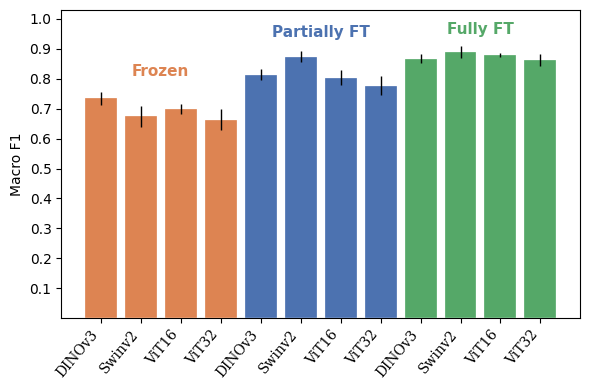

In [42]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=100)

palette = {
    "F": "#DD8452",    # frozen
    "UF4": "#4C72B0",  # partially unfrozen
    "UF": "#55A868",   # unfrozen
}

num_bars = len(df.run)
bar_colors = []
for i in range(num_bars):
    if i < 4:
        bar_colors.append(palette['F'])
    elif i < 8:
        bar_colors.append(palette['UF4'])
    else:
        bar_colors.append(palette['UF'])
ax.bar(df.run, df['mean'],
       yerr=df['std'],
       error_kw={'elinewidth':1},
       color=bar_colors,
       edgecolor='white',
       linewidth=0.2,
       capsize=0,
       zorder=1000)
ax.set_ylabel("Macro F1")
ax.set_xticks(
    df.run,
    labels=[f.split('_')[0] for f in df.run],
    rotation=50,
    ha='right',
)
for label in ax.get_xticklabels():
    label.set_fontweight('regular')
    label.set_fontsize(10)
    label.set_family("serif")

ax.set_ylim(0, 1.03)
ax.set_yticks(np.arange(0.1, 1.1, 0.1))
ax.text(1.5, 0.80, "Frozen",
        ha="center", va="bottom",
        fontsize=11, fontweight="bold",
        color=palette["F"])
ax.text(5.5, 0.93, "Partially FT",
        ha="center", va="bottom",
        fontsize=11, fontweight="bold",
        color=palette["UF4"])
ax.text(9.5, 0.94, "Fully FT",
        ha="center", va="bottom",
        fontsize=11, fontweight="bold",
        color=palette["UF"])

plt.tight_layout()
plt.tight_layout()
# plt.savefig(
#     os.path.join(working_dir, "Plots", "phase1_macro_f1_comparison.png"),
#     dpi=300,
#     bbox_inches="tight"
# )
plt.show()


In [10]:
import os
import numpy as np
import pandas as pd

def build_phase2_dataframe(phase2_dir):
    records = []
    splits = ["split1", "split2", "split3"]

    for backbone in sorted(os.listdir(phase2_dir)):
        backbone_path = os.path.join(phase2_dir, backbone)
        if not os.path.isdir(backbone_path):
            continue

        for representation in sorted(os.listdir(backbone_path)):
            rep_path = os.path.join(backbone_path, representation)
            if not os.path.isdir(rep_path):
                continue

            split_scores = {}

            for split in splits:
                split_path = os.path.join(rep_path, split)
                if not os.path.isdir(split_path):
                    print(f"⚠️ Missing {split_path}")
                    split_scores[split] = np.nan
                    continue

                report_files = [
                    f for f in os.listdir(split_path)
                    if f.startswith("clfreport_") and f.endswith(".txt")
                ]

                if len(report_files) == 0:
                    print(f"⚠️ No report found in {split_path}")
                    split_scores[split] = np.nan
                    continue

                if len(report_files) > 1:
                    print(f"⚠️ Multiple reports found in {split_path}, using first one")

                report_path = os.path.join(split_path, report_files[0])
                split_scores[split] = extract_macro_f1(report_path)

            values = np.array(list(split_scores.values()), dtype=float)

            records.append({
                "backbone": backbone,
                "representation": representation,
                "macro_f1_mean": np.nanmean(values),
                "macro_f1_std": np.nanstd(values),
                **split_scores
            })

    return pd.DataFrame(records)

In [22]:
df_phase2 = build_phase2_dataframe(phase2_dir)
df_phase2.sort_values(
    by=["backbone", "macro_f1_mean"],
    ascending=[True, False],
    inplace=True
)
df_phase2.reset_index(drop=True, inplace=True)
df_phase2.head()

,backbone,representation,macro_f1_mean,macro_f1_std,split1,split2,split3
0,DINOv3,v2.0,0.866900,0.013691,0.8497,0.8832,0.8678
1,DINOv3,v2.0_50x50,0.796933,0.015307,0.7757,0.8112,0.8039
2,DINOv3,v2.0_224x112,0.790800,0.033128,0.8010,0.8253,0.7461
3,DINOv3,v2.0_20x20_n,0.787733,0.016831,0.7781,0.8114,0.7737
4,DINOv3,v2.0_224x56_n,0.787500,0.035552,0.8203,0.8041,0.7381


In [20]:
df2 = df_phase2.copy()
rep_order = (
    df2.groupby("representation")["macro_f1_mean"]
      .mean()
      .sort_values(ascending=True)
      .index
)
df2["representation"] = pd.Categorical(
    df2["representation"],
    categories=rep_order,
    ordered=True
)

df2.sort_values(["representation", "backbone"], inplace=True)
df2.reset_index(drop=True, inplace=True)

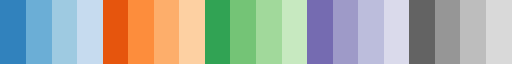

In [13]:
# tab20c colormap
import matplotlib as mpl
cmap = mpl.colormaps["tab20c"]
cmap

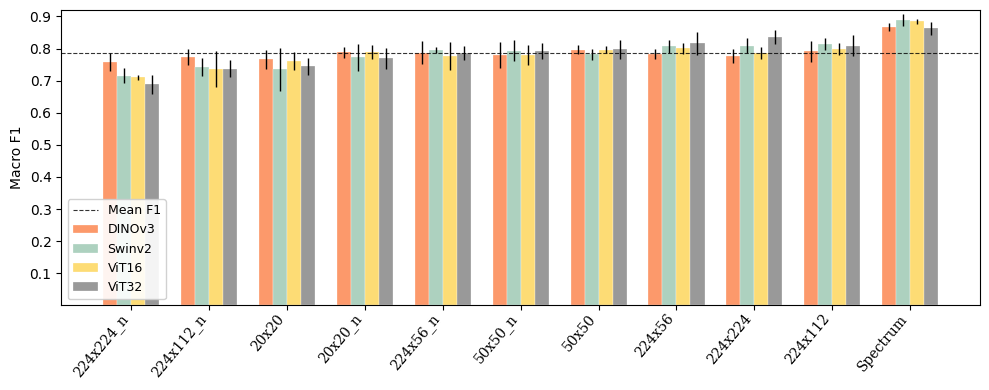

In [41]:
representations = df2["representation"].astype('category').cat.categories
representations = [i[5:] for i in representations]
representations[-1] = "Spectrum"

backbones = df2["backbone"].unique()
mean_f1 = df2["macro_f1_mean"].mean()
n_rep = len(representations)
n_back = len(backbones)

bar_width = 0.18
x = np.arange(n_rep)

palette = {
    "ViT32":  "#999999", #"#3c9fd0", #cmap(16),
    "ViT16":  "#fddc75", #cmap(9),
    "DINOv3": "#fc996b", #cmap(5),
    "Swinv2": "#add1bf", #cmap(1),
}

fig, ax = plt.subplots(figsize=(10, 4), dpi=100)

for i, backbone in enumerate(backbones):
    subset = df2[df2["backbone"] == backbone]
    ax.bar(
        x + i * bar_width,
        subset["macro_f1_mean"],
        width=bar_width,
        yerr=subset['macro_f1_std'],
        error_kw={'elinewidth':1},
        edgecolor='white',
        linewidth=0.2,
        capsize=0,
        label=backbone,
        color=palette.get(backbone),
        zorder=0,
    )
ax.axhline(
    mean_f1,
    color="black",
    linestyle="--",
    linewidth=0.8,
    alpha=0.8,
    zorder=500,
    label=f"Mean F1"
)
ax.set_ylabel("Macro F1")

ax.set_xticks(
    x + bar_width * (n_back - 1) / 2,
    labels=representations, rotation=50, ha="right")

ax.tick_params(axis='x', labelsize=10, labelfontfamily='serif', pad=1)
ax.legend(
    loc='lower left',
    title="",
    frameon=True,
    framealpha=0.9,
    fontsize=9,
    title_fontsize=10,
)
ax.set_ylim(0, 0.92)
ax.set_yticks(np.arange(0.1, 1.0, 0.1))

plt.tight_layout()
# plt.savefig(
#     os.path.join(working_dir, "Plots", "phase2_macro_f1_comparison.png"),
#     dpi=300,
#     bbox_inches="tight"
# )
plt.show()